In [18]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind6")

def parse_logs(path: Path) -> pd.DataFrame:
    inflate = int((path / "inf_log.txt").read_text().splitlines()[1][:-1])
    deflate = int((path / "def_log.txt").read_text().splitlines()[1][:-1])
    mode = path.stem.split("-")[2]
    columns = {"mode": [mode, mode], "op": ["inflate", "deflate"], "time": [inflate, deflate]}
    return pd.DataFrame(columns)


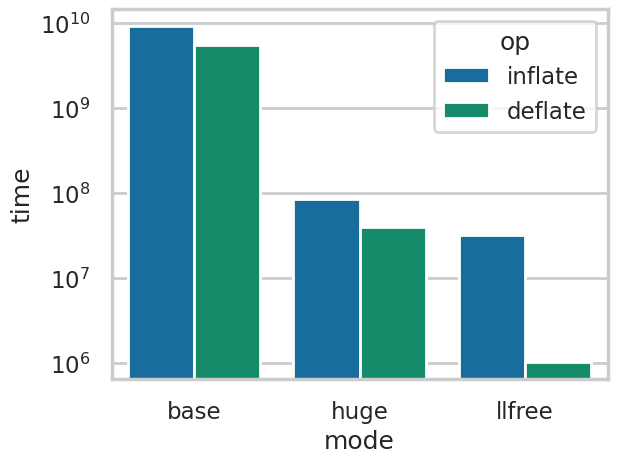

In [19]:
base = Path("inflate/240419-144848-base-manual")
huge = Path("inflate/240419-144949-huge-manual")
llfree = Path("inflate/240419-145035-llfree-manual")
paths = [base, huge, llfree]

data = pd.concat([parse_logs(p) for p in paths])
data

p = sns.barplot(data, y="time", x="mode", hue="op")
p.set_yscale("log")
